In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [30]:
file_path = 'force2020_data_unsupervised_learning.csv'
df = pd.read_csv(file_path, index_col='DEPTH_MD')

In [31]:
df.dropna(inplace=True)

In [32]:
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(df)

we use median To prevent any outlier can be indicated.

In [33]:
scaler = MinMaxScaler()

df[['RHOB_T', 'NPHI_T', 'GR_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(df[['RHOB', 'NPHI', 'GR', 'PEF', 'DTC']])

Euclidean Distance Dependency:

K-Means uses Euclidean distance to measure the similarity or closeness of points to the centroids.

In [34]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-0.701129,1.494558,-0.200194,-0.842684,0.166364
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-0.636215,1.666496,-0.056025,-0.836080,0.069408
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-0.595064,1.495008,-0.022015,-0.835695,-0.003889
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-0.566406,1.177896,-0.053686,-0.848166,0.012827
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-0.604526,0.863897,-0.125525,-0.904241,0.103313
...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.006965,-0.626652,0.791527,0.648462,-0.924240
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,0.980571,-0.578904,0.742337,0.648462,-0.929340
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,0.910903,-0.509436,0.837082,0.648462,-0.900722


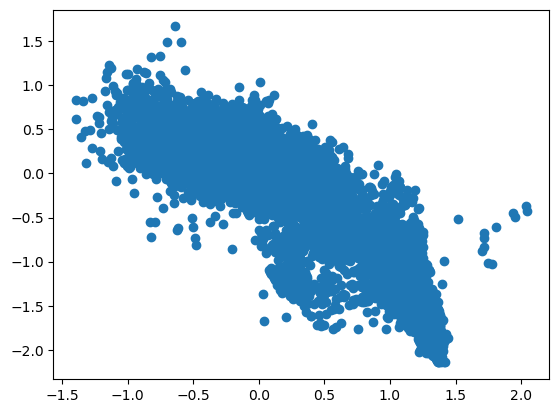

In [35]:
plt.scatter(df['RHOB_T'], df['NPHI_T'])

In [36]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    # Elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k), inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

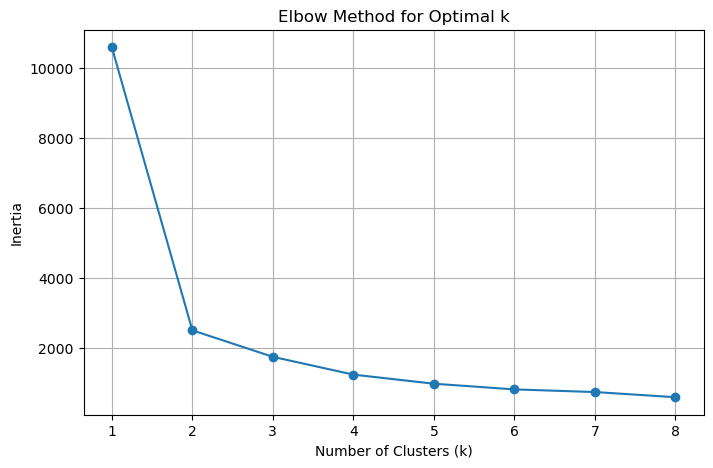

In [37]:
optimise_k_means(df[['RHOB_T', 'NPHI_T']], 9)

Plot Inertia vs. Number of Clusters:

On the x-axis: Number of clusters (k).
On the y-axis: Inertia (WCSS).


Identify the "Elbow Point":
The "elbow" is the point where the rate of decrease in inertia slows down noticeably.
It indicates the optimal number of clusters as adding more clusters beyond this point results in diminishing returns.

In the context of clustering, inertia (also known as Within-Cluster Sum of Squares (WCSS)) is a metric used to measure the quality of clustering. It represents the sum of squared distances between each data point and the centroid of the cluster to which it belongs.

A lower inertia value indicates that the data points are closer to their respective cluster centroids, which suggests tighter, more cohesive clusters.



In [38]:
import time
start_time = time.time()
n_clusters=2
kmeans = KMeans(n_clusters)

kmeans.fit(df[['RHOB_T', 'NPHI_T']])

df['cluster'] = kmeans.labels_
end_time = time.time()
execution_time = end_time - start_time

kmeans.cluster_centers_

array([[-0.13647502,  0.15038758],
       [ 1.01948821, -1.17371961]])

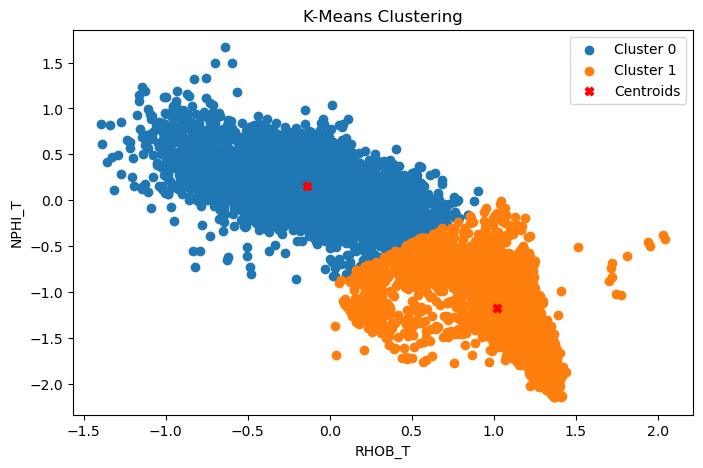

In [39]:
plt.figure(figsize=(8, 5))
for i in range(n_clusters):
    cluster_data = df[df.cluster == i]
    plt.scatter(cluster_data['RHOB_T'], cluster_data['NPHI_T'], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroids')

plt.xlabel('RHOB_T')
plt.ylabel('NPHI_T')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [40]:
silhouette_avg = silhouette_score(df[['RHOB_T', 'NPHI_T']], df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6794241711527839


The Silhouette is a metric used to evaluate the quality of clustering in unsupervised learning. It measures how well each data point lies within its cluster, relative to other clusters. A high silhouette score indicates that the data point is well-matched to its own cluster and poorly matched to other clusters.


-1 => misclassifed 
0 => misclassied but near clusters boundires 
1 => the point is in it's exactly cluster 

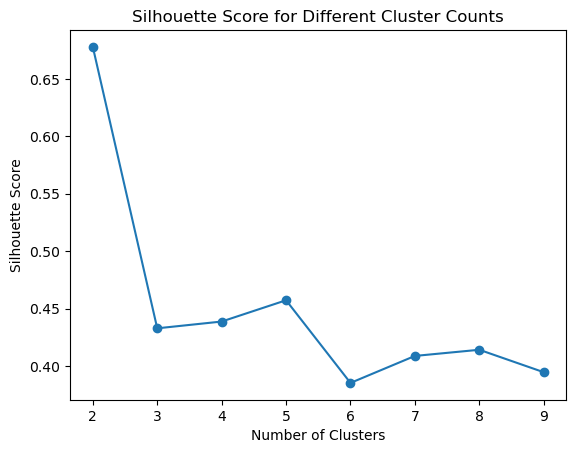

Optimal number of clusters: 2


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Standardize the features
scaler = StandardScaler()
df[['RHOB_T', 'NPHI_T']] = scaler.fit_transform(df[['RHOB_T', 'NPHI_T']])
silhouette_scores = []
range_n_clusters = range(2, 10)  
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['RHOB_T', 'NPHI_T']])
    score = silhouette_score(df[['RHOB_T', 'NPHI_T']], cluster_labels)
    silhouette_scores.append(score)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_clusters}')


In [42]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index for KMeans model
dbi_kmeans = davies_bouldin_score(df[['RHOB_T', 'NPHI_T']], df['cluster'])

print(f"Davies-Bouldin Index for KMeans: {dbi_kmeans}")
print(f"Execution Time for KMeans: {execution_time:.4f} seconds")



Davies-Bouldin Index for KMeans: 0.4666064435158949
Execution Time for KMeans: 0.0160 seconds
